# 🌦️ WeatherWise – Built by Rudra

Welcome to **WeatherWise**, a smart weather advisor app crafted by Rudra. This project leverages Python, data visualization, and AI tools to transform weather data into insightful and actionable guidance. Explore the power of intelligent forecasting with WeatherWise!


## 🧰 Setup and Imports


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.8/459.8 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.8/454.8 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 75.2 MB/s eta 0:00:00
  Attempting uninstall: fastcore
    Found existing in

In [4]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: student-api-key-123


## 📦 Setup and Configuration


In [6]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
import re
import json
# ✅ Import after installing
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

## 🌤️ Weather Data Functions

In [8]:
# function to retrive weather data
def get_weather_data(location, forecast_days=5):
    """
    Retrieve weather data for a specified location.

    Args:
        location (str): City or location name
        forecast_days (int): Number of days to forecast (1-5)

    Returns:
        dict: Weather data including current conditions and forecast, or an error message
    """
    # Input validation
    if not isinstance(location, str) or not location.strip():
        return {"error": "Invalid location. Please provide a non-empty city name."}
    if not isinstance(forecast_days, int) or not (1 <= forecast_days <= 5):
        return {"error": "Forecast days must be an integer between 1 and 5."}

    try:
        weather = get_weather(location=location, view_options=str(forecast_days), with_metadata=False)
        parsed_data = json.loads(weather.json())

        current_condition = parsed_data.get("current_condition", [{}])[0]
        weather_forecast = parsed_data.get("weather", [])[:forecast_days]

        # Destructure and keep the relevent data from the response
        result = {
            "location": location.title(),
            "current": {
                "temperature_C": current_condition.get("temp_C"),
                "weather_desc": current_condition.get("weatherDesc", [{}])[0].get("value"),
                "humidity": current_condition.get("humidity"),
                "wind_kph": current_condition.get("windspeedKmph"),
                "feels_like_C": current_condition.get("FeelsLikeC")
            },
            "forecast": []
        }

        for day in weather_forecast:
            result["forecast"].append({
                "date": day.get("date"),
                "max_temp_C": day.get("maxtempC"),
                "max_temp_F": day.get("maxtempF"),
                "min_temp_C": day.get("mintempC"),
                "min_temp_F": day.get("mintempF"),
                "avg_temp_C": day.get("avgtempC"),
                "avg_temp_F": day.get("avgtempF"),
                "sun_hour": day.get("sunHour"),
                "total_Snow_cm": day.get("totalSnow_cm"),
                "uv_index": day.get("uvIndex"),
                "description": day.get("hourly", [{}])[0].get("weatherDesc", [{}])[0].get("value")
            })

        return result

    except Exception as e:
        return {"error": f"Failed to retrieve weather data: {str(e)}"}


## 📊 Visualisation Functions

In [11]:
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of temperature data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    # Validate input
    if 'forecast' not in weather_data:
        raise ValueError("Missing 'forecast' key in weather_data")

    dates = [day["date"] for day in weather_data["forecast"]]
    max_temps = [int(day["max_temp_C"]) for day in weather_data["forecast"]]
    min_temps = [int(day["min_temp_C"]) for day in weather_data["forecast"]]
    avg_temps = [int(day["avg_temp_C"]) for day in weather_data["forecast"]]

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(dates, max_temps, label='Max Temp (°C)', color='red', marker='o')
    ax.plot(dates, min_temps, label='Min Temp (°C)', color='blue', marker='o')
    ax.plot(dates, avg_temps, label='Avg Temp (°C)', color='green', marker='o')

    ax.set_title(f"Temperature Forecast for {weather_data.get('location', 'Unknown')}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature (°C)")
    ax.legend()
    ax.grid(True)

    plt.tight_layout()

    if output_type == 'figure':
        return fig
    else:
        plt.show()
        return None


In [10]:

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of precipitation data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    # Validate input
    if 'forecast' not in weather_data:
        raise ValueError("Missing 'forecast' key in weather_data")

    dates = [day["date"] for day in weather_data["forecast"]]

    total_precip_mm = []
    for day in weather_data["forecast"]:
        day_precip = 0
        if "hourly" in day:
            for hour in day["hourly"]:
                try:
                    day_precip += float(hour.get("precipMM", 0))
                except ValueError:
                    day_precip += 0
        total_precip_mm.append(round(day_precip, 1))

    fig, ax = plt.subplots(figsize=(10, 6))

    bars = ax.bar(dates, total_precip_mm, color='skyblue')
    ax.set_title(f"Precipitation Forecast for {weather_data.get('location', 'Unknown')}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Total Precipitation (mm)")
    ax.grid(axis='y')

    # Add values on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

    plt.tight_layout()

    if output_type == 'figure':
        return fig
    else:
        plt.show()
        return None

## 🤖 Natural Language Processing

In [21]:
import spacy

nlp = spacy.load("en_core_web_sm")

TIME_PERIODS = {
    "now", "right now", "currently", "today", "tonight", "this morning", "this afternoon", "this evening",
    "tomorrow", "tomorrow morning", "tomorrow afternoon", "tomorrow evening",
    "day after tomorrow", "the day after tomorrow",
    "weekend", "this weekend", "next weekend",
    "next week", "this week",
    "next month", "this month",
    "in an hour", "in 1 hour", "in 2 hours", "in 3 hours",
    "hourly", "daily", "weekly", "monthly"
}

WEATHER_ATTRIBUTES = {
    "temperature", "rain", "rainfall", "humidity", "wind", "wind speed",
    "snow", "snowfall", "sunshine", "sun", "cloud", "cloudiness", "uv index", "pressure"
}

def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including location, time period, and weather attribute
    """
    question_lower = question.lower()
    doc = nlp(question_lower)

    locations = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    time_periods = [tp for tp in TIME_PERIODS if tp in question_lower]
    attributes = [attr for attr in WEATHER_ATTRIBUTES if attr in question_lower]

    return {
        "locations": locations,
        "time_periods": time_periods,
        "weather_attributes": attributes
    }

{'locations': ['new york', 'san francisco'], 'time_periods': ['weekend', 'next week', 'this weekend', 'this week'], 'weather_attributes': ['rain']}


## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [ ]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

In [17]:
def test_get_weather_io():
    """
    Demonstrates a sample input and output for the get_weather function.
    """
    location = input("Sample Input:")
    forecast_days = int(input("Forecast Days:"))

    print("Sample Output:")
    weather_data = get_weather_data(location, forecast_days)

    if weather_data:
        from pprint import pprint
        pprint(weather_data)
    else:
        print("Failed to retrieve or parse weather data.")

test_get_weather_io()

Sample Input:london
Forecast Days:2
Sample Output:
{'current': {'feels_like_C': '16',
             'humidity': '71',
             'temperature_C': '17',
             'weather_desc': 'Partly cloudy',
             'wind_kph': '11'},
 'forecast': [{'avg_temp_C': '14',
               'avg_temp_F': '57',
               'date': '2025-04-13',
               'description': 'Clear',
               'max_temp_C': '18',
               'max_temp_F': '64',
               'min_temp_C': '9',
               'min_temp_F': '48',
               'sun_hour': '10.5',
               'total_Snow_cm': '0.0',
               'uv_index': '4'}],
 'location': 'London'}


<ipython-input-8-ed7cb1a624b5>:21: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  parsed_data = json.loads(weather.json())


Sample Input:london
Forecast Days:2
Sample Output:


<ipython-input-8-ed7cb1a624b5>:21: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  parsed_data = json.loads(weather.json())


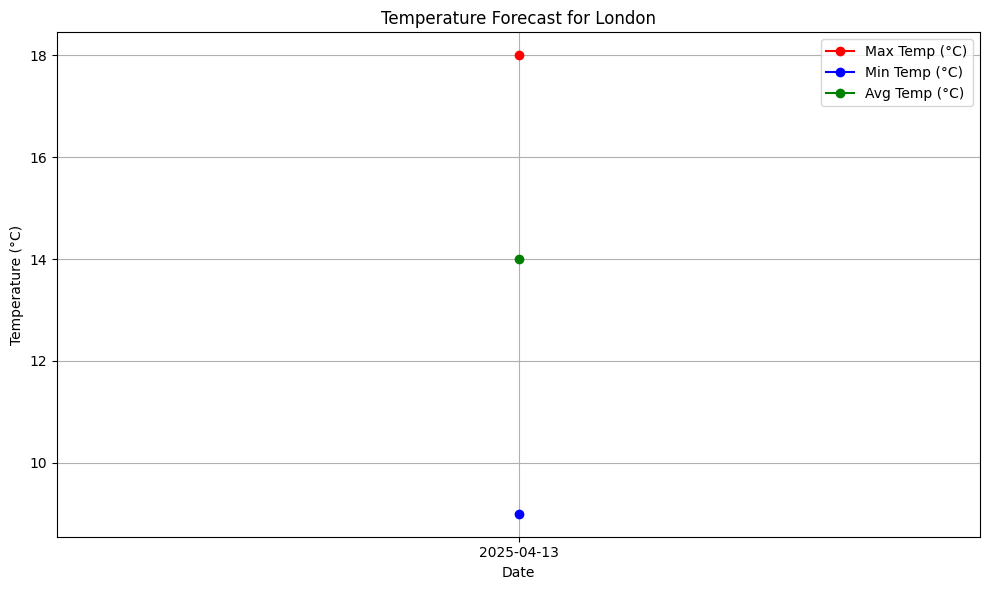

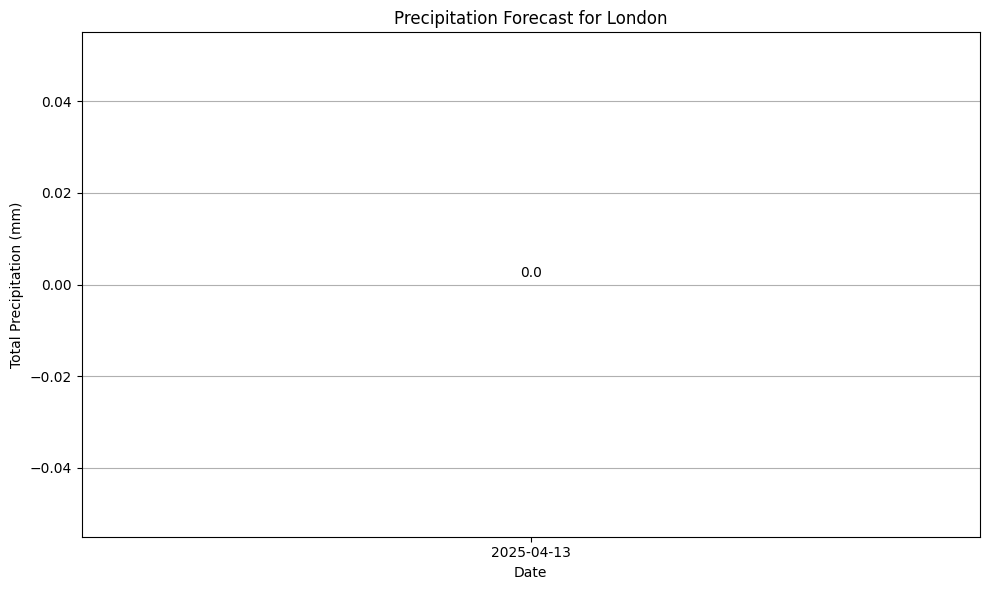

In [30]:
def test_data_visulaization_io():
    """
    Demonstrates a sample input and output for the get_weather function.
    """
    location = input("Sample Input:")
    forecast_days = int(input("Forecast Days:"))

    print("Sample Output:")
    weather_data = get_weather_data(location, forecast_days)

    if weather_data:
        create_temperature_visualisation(weather_data)
        create_precipitation_visualisation(weather_data)
    else:
        print("Failed to retrieve or parse weather data.")

test_data_visulaization_io()

In [27]:
# test_parse_weather_question
query = "Will it rain this weekend in New York or next week in San Francisco?"
result = parse_weather_question(query)
print(result)

{'locations': ['new york', 'san francisco'], 'time_periods': ['weekend', 'next week', 'this weekend', 'this week'], 'weather_attributes': ['rain']}
